# Imports

In [1]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydub import AudioSegment
import wave
import math

# Loading data

In [2]:
main_directory = os.getcwd() + "\\..\\datasets\\glados\\wavs\\"
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

In [3]:
data = pd.DataFrame(audio_lengths, columns=["Length"])
data.head()

,Length
0,6.260907
1,10.122902
2,4.330884
3,13.555873
4,9.175873


In [4]:
data["Length"].describe()

count    458.000000
mean       7.159920
std        3.111599
min        2.789887
25%        4.359388
50%        6.719909
75%        9.404909
max       16.910884
Name: Length, dtype: float64

# Dataset length (s)

In [5]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    math.floor(data_audio / 3600), 
    math.floor((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 0 hours 54 minutes 39.2 seconds


Text(0.5, 1.0, 'Histogram of audio file lengths in glados dataset')

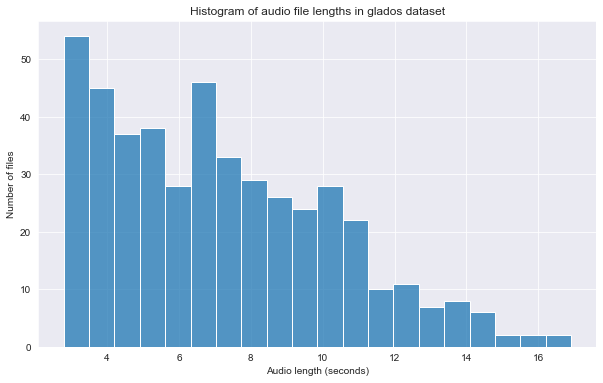

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data["Length"], bins=20, kde=False)
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in glados dataset")

# Sample file characteristics

Text(0.5, 1.0, 'Sample audio plot')

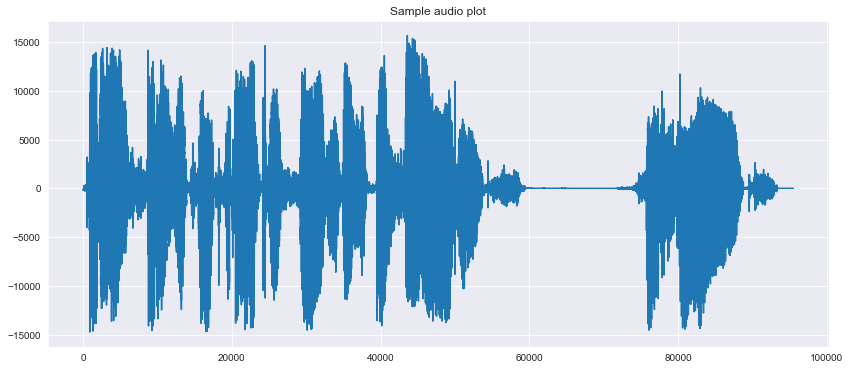

In [7]:
file_name = main_directory + "GLADOS-0003.wav"
audio_file = wave.open(file_name, "r")
signal = audio_file.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
plt.figure(figsize=(14, 6))
sns.lineplot(data=signal)
plt.title("Sample audio plot")